In [24]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [25]:
plt.style.use('seaborn-colorblind')

In [26]:
tickers=['SBUX','AMZN','TSLA','AAPL','META']

In [27]:
data = pdr.get_data_yahoo(tickers, start="2018-01-01",end=dt.date.today())['Adj Close']

In [28]:
returns = data.pct_change()

In [29]:
data

Symbols,SBUX,AMZN,TSLA,AAPL,META
Date,,,,,
2018-01-02,52.350147,59.450500,21.368668,41.018429,181.419998
2018-01-03,53.331200,60.209999,21.150000,41.011284,184.669998
2018-01-04,53.531048,60.479500,20.974667,41.201771,184.330002
2018-01-05,54.148746,61.457001,21.105333,41.670883,186.850006
2018-01-08,53.876232,62.343498,22.427334,41.516098,188.279999
...,...,...,...,...,...
2022-10-24,83.760002,119.820000,211.250000,149.449997,129.720001
2022-10-25,85.209999,120.599998,222.419998,152.339996,137.509995
2022-10-26,85.889999,115.660004,224.639999,149.350006,129.820007


In [30]:
data.tail()

Symbols,SBUX,AMZN,TSLA,AAPL,META
Date,,,,,
2022-10-24,83.760002,119.820000,211.250000,149.449997,129.720001
2022-10-25,85.209999,120.599998,222.419998,152.339996,137.509995
2022-10-26,85.889999,115.660004,224.639999,149.350006,129.820007
2022-10-27,85.279999,110.959999,225.089996,144.800003,97.940002
2022-10-28,87.099998,103.410004,228.520004,155.740005,99.199997


Text(0, 0.5, 'price($)')

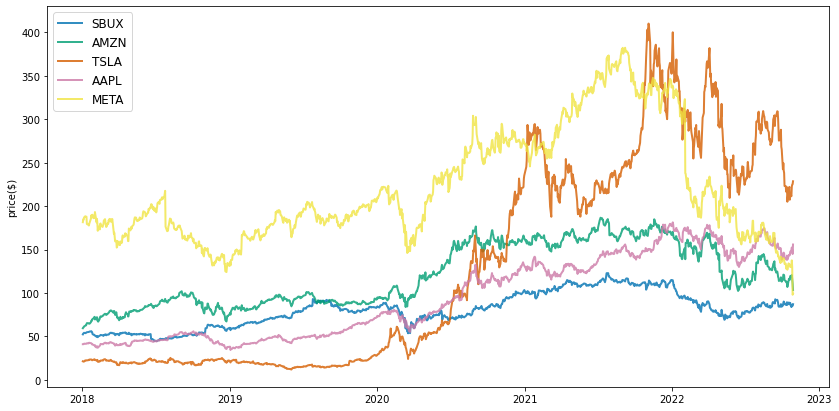

In [31]:
plt.figure(figsize=(14,7))
for i in data.columns.values:
    plt.plot(data.index, data[i], lw=2, alpha=0.8, label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price($)')

Text(0, 0.5, 'daily returns')

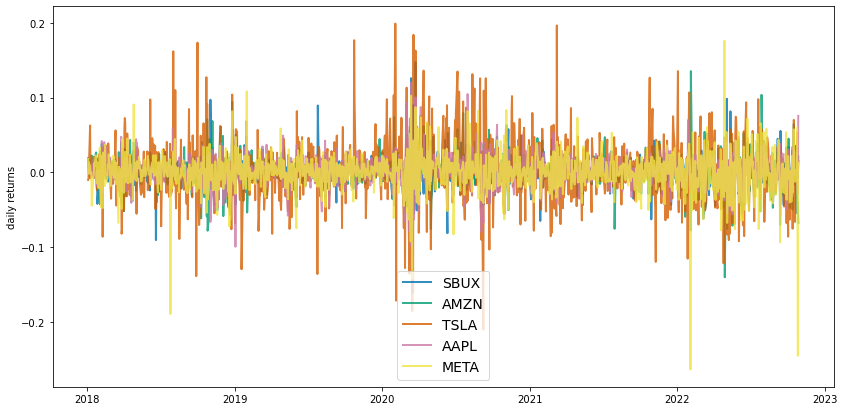

In [32]:
returns=data.pct_change()
plt.figure(figsize=(14,7))
for i in returns.columns.values:
    plt.plot(returns.index,returns[i], lw=2, alpha=0.8, label=i)
plt.legend(loc='lower center', fontsize=14)
plt.ylabel('daily returns')

In [33]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*252
    std=np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))*np.sqrt(252)
    return std, returns

In [34]:
def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results=np.zeros((3,num_portfolios))
    weight_array=[]
    for i in range(num_portfolios):
        weights=np.random.random(5)
        weights/=np.sum(weights)
        weight_array.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i]=portfolio_std_dev
        results[1,i]=portfolio_return
        results[2,i]=(portfolio_return-risk_free_rate)/portfolio_std_dev
    return results, weight_array

In [35]:
def display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = generate_random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])

    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return :", round(returns_portfolio,2))
    print("Annualized Volatility :", round(stdev_portfolio,2))
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)
    
    plt.figure(figsize=(16,9))
    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x', color='r', s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)


----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return : 0.47
Annualized Volatility : 0.41


--Allocation at max Sharpe ratio--

Symbols     SBUX  AMZN   TSLA   AAPL  META
allocation  5.18  7.04  46.74  35.95  5.09
----------------------------------------------------------------------------------------------------


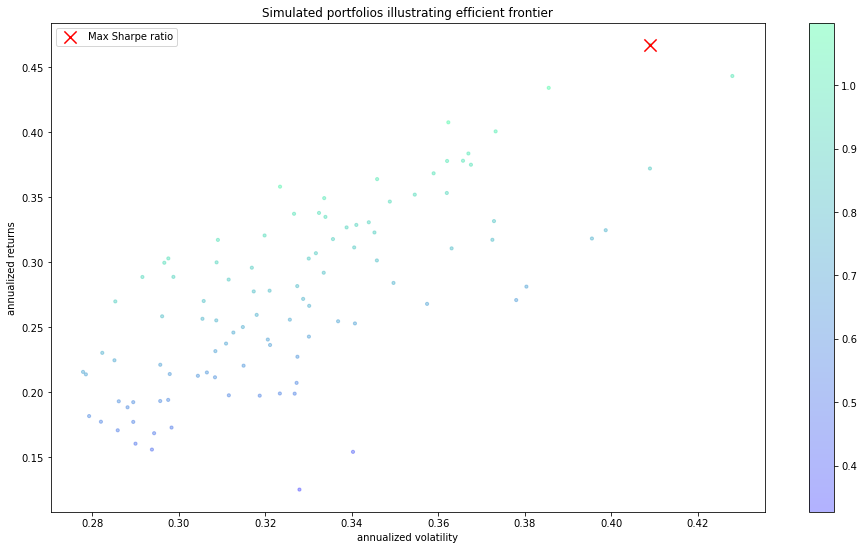

In [36]:
returns=data.pct_change()
mean_returns=returns.mean()
cov_matrix = returns.cov()
num_portfolios = 100
risk_free_rate = 0.018
display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate)